# Приоритизация гипотез и анализ данных A/B-теста


**Цели и задачи проекта:** выделить приоритетные гипотезы, направленные на увеличение выручки, а также проанализировать результаты A/B-теста, проводимого на основе данных интернет-магазина.

**Входные данные:** (1) перечень гипотез, предложенных с целью увеличения выручки интерне-магазина, и их количественная оценка по различным критериям (охват и влияние на пользователей, уверенность в гипотезе, оценка затрат); (2) данные А/В теста с информацией о посетителях интернет-магазина и совершенных ими заказах.

**Обозначения категорий исходных данных:** Исходные данные для проекта содержатся в трех файлах формата csv. Обозначения переменных для каждого датасета приведены ниже:

1) Гипотезы по увеличению выручки интернет-магазина (hypothesis.csv)
* *Hypothesis* — краткое описание гипотезы,
* *Reach* — охват пользователей по 10-балльной шкале,
* *Impact* — влияние на пользователей по 10-балльной шкале,
* *Confidence* — уверенность в гипотезе по 10-балльной шкале,
* *Effort* — затраты ресурсов на проверку гипотезы по 10-балльной шкале (чем больше значение, тем дороже проверка гипотезы).

2) Датасет с информацией о заказах (orders.csv)
* *transactionId* — идентификатор заказа,
* *visitorId* — идентификатор пользователя, совершившего заказ,
* *date* — дата, когда был совершён заказ,
* *revenue* — выручка заказа,
* *group* — группа A/B-теста, в которую попал заказ.

3) Датасет с информацией о посетителях (visitors.csv)
* *date* — дата,
* *group* — группа A/B-теста,
* *visitors* — количество пользователей в указанную дату в указанной группе A/B-теста.

**План работы** над проектом включает в себя выполнение следующих шагов:
* *Импорт данных и изучение общей информации.* На этом этапе получаем общую информацию об имеющихся у нас в распоряжении данных, их типах, полноте и правильности представления. Предварительно оцениваем объем данных в каждом датасете, их минимальные и максимальные значения, присутствие пропусков и дубликатов. Дополнительно импортируем и устанавливаем обновления необходимых библиотек. 

* *Подготовка данных.* В этой части работы обращаем пристальное внимание на недостатки исходных данных: переименовываем переменные (названия столбцов) и приводим их названия к единому стандарту. Анализируем пропуски и оцениваем необходимость обработки пропусков в данных. Преобразуем данные в верный тип, проверяем их на присутствие ошибочных значений и обрабатываем дубликаты (если присутствуют) с целью исключения искажений в результатах. 

* *Расчет и анализ данных.* В данном проекте эта стадия складывается из выполнения двух этапов: (1) приоритизация гипотез и (2) анализ результатов предварительно проведенного A/B-теста. На первом этапе определяем приоритетные гипотезы с использованием подходов ICE и RICE, которые в последствии могут быть протестированы в первую очередь. На втором этапе проводим расчеты и анализ данных по кумулятивным данным о выручке, среднем чеке и конверсии для контрольной (А) и целевой (В) групп. Анализируем метрики с учетом имеющихся выбросов по числу и стоимости заказов. Определяем статистическую значимость различий в конверсии и среднем чеке для обеих групп и подводим итоги по результатам проведения A/B теста.

* *Формулирование общего вывода*. На заключительном этапе приводится сумма выводов и рекомендаций по каждой части выполненного проекта. В общем выводе мы отразим какие гипотезы на основе полученных оценок могут считаться приоритетными, а также сформулируем выводы о результатах A/B теста.  

**Используемые сокращения:**
* *ICE* (от англ. Impact, Confidence, Effort/Ease) — метод определения приоритетов, учитывающий (I) влияние, (C) уверенность и (E) усилия/простота для реализации гипотезы;
* *RICE* (от англ. Reach, Impact, Confidence, Effort/Ease) — метод определения приоритетов, учитывающий: (R) охват пользователей, которых затронет внесенное изменение; (I) степень влияния нововведения на пользователей, их опыт и удовлетворение от продукта; (C) уверенность в том, что изменение повлияет на пользователей как предполагается; (E) усилия/простота, которые необходимо предпринять, чтобы протестировать эту гипотезу.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-данных-и-изучение-общей-информации" data-toc-modified-id="Импорт-данных-и-изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт данных и изучение общей информации</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчет-и-анализ-данных" data-toc-modified-id="Расчет-и-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчет и анализ данных</a></span><ul class="toc-item"><li><span><a href="#Приоритизация-гипотез" data-toc-modified-id="Приоритизация-гипотез-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Приоритизация гипотез</a></span><ul class="toc-item"><li><span><a href="#Метод-ICE" data-toc-modified-id="Метод-ICE-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Метод ICE</a></span></li><li><span><a href="#Метод-RICE" data-toc-modified-id="Метод-RICE-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Метод RICE</a></span></li><li><span><a href="#Приоритизация-гипотез" data-toc-modified-id="Приоритизация-гипотез-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Приоритизация гипотез</a></span></li></ul></li><li><span><a href="#Анализ-предварительно-проведенного-A/B-теста" data-toc-modified-id="Анализ-предварительно-проведенного-A/B-теста-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Анализ предварительно проведенного A/B-теста</a></span><ul class="toc-item"><li><span><a href="#Проверка-датасетов-на-соответствие-условиям-проведения-А/B-теста" data-toc-modified-id="Проверка-датасетов-на-соответствие-условиям-проведения-А/B-теста-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Проверка датасетов на соответствие условиям проведения А/B-теста</a></span></li><li><span><a href="#Кумулятивная-выручка-по-группам" data-toc-modified-id="Кумулятивная-выручка-по-группам-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Кумулятивная выручка по группам</a></span></li><li><span><a href="#Кумулятивный-средний-чек-по-группам" data-toc-modified-id="Кумулятивный-средний-чек-по-группам-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Кумулятивный средний чек по группам</a></span></li><li><span><a href="#Относительное-изменение-кумулятивного-среднего-чека-группы-B-к-группе-A" data-toc-modified-id="Относительное-изменение-кумулятивного-среднего-чека-группы-B-к-группе-A-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Относительное изменение кумулятивного среднего чека группы B к группе A</a></span></li><li><span><a href="#Изменение-кумулятивной-конверсии-по-группам" data-toc-modified-id="Изменение-кумулятивной-конверсии-по-группам-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>Изменение кумулятивной конверсии по группам</a></span></li><li><span><a href="#Относительное-изменение-кумулятивной-конверсии-по-группам" data-toc-modified-id="Относительное-изменение-кумулятивной-конверсии-по-группам-3.2.6"><span class="toc-item-num">3.2.6&nbsp;&nbsp;</span>Относительное изменение кумулятивной конверсии по группам</a></span></li><li><span><a href="#Количество-заказов-по-пользователям" data-toc-modified-id="Количество-заказов-по-пользователям-3.2.7"><span class="toc-item-num">3.2.7&nbsp;&nbsp;</span>Количество заказов по пользователям</a></span></li><li><span><a href="#Cтоимость-заказов" data-toc-modified-id="Cтоимость-заказов-3.2.8"><span class="toc-item-num">3.2.8&nbsp;&nbsp;</span>Cтоимость заказов</a></span></li><li><span><a href="#Статистическая-значимость-различий-в-конверсии-между-группами-по-«сырым»-данным" data-toc-modified-id="Статистическая-значимость-различий-в-конверсии-между-группами-по-«сырым»-данным-3.2.9"><span class="toc-item-num">3.2.9&nbsp;&nbsp;</span>Статистическая значимость различий в конверсии между группами по «сырым» данным</a></span></li><li><span><a href="#Cтатистическая-значимость-различий-в-среднем-чеке-заказа-между-группами-А-и-В-по-«сырым»-данным" data-toc-modified-id="Cтатистическая-значимость-различий-в-среднем-чеке-заказа-между-группами-А-и-В-по-«сырым»-данным-3.2.10"><span class="toc-item-num">3.2.10&nbsp;&nbsp;</span>Cтатистическая значимость различий в среднем чеке заказа между группами А и В по «сырым» данным</a></span></li><li><span><a href="#Статистическая-значимость-различий-в-конверсии-между-группами-A-и-В-по-«очищенным»-данным" data-toc-modified-id="Статистическая-значимость-различий-в-конверсии-между-группами-A-и-В-по-«очищенным»-данным-3.2.11"><span class="toc-item-num">3.2.11&nbsp;&nbsp;</span>Статистическая значимость различий в конверсии между группами A и В по «очищенным» данным</a></span></li><li><span><a href="#Статистическая-значимость-различий-в-среднем-чеке-заказа-между-группами-A-и-В-по-«очищенным»-данным" data-toc-modified-id="Статистическая-значимость-различий-в-среднем-чеке-заказа-между-группами-A-и-В-по-«очищенным»-данным-3.2.12"><span class="toc-item-num">3.2.12&nbsp;&nbsp;</span>Статистическая значимость различий в среднем чеке заказа между группами A и В по «очищенным» данным</a></span></li><li><span><a href="#Решение-по-результатам-A/B-теста" data-toc-modified-id="Решение-по-результатам-A/B-теста-3.2.13"><span class="toc-item-num">3.2.13&nbsp;&nbsp;</span>Решение по результатам A/B теста</a></span></li></ul></li></ul></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы и рекомендации</a></span></li></ul></div>

## Импорт данных и изучение общей информации

In [1]:
!pip install plotly==5.1.0 -q
!pip install seaborn --upgrade -q

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import math

# модуль для работы с функциями статистики
import scipy.stats as stats

# графические библиотеки
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [3]:
# получение статичных изображений графиков plotly для отображения на GitHub
import plotly.io as pio
pio.renderers.default = "svg"

In [4]:
df_hypothesis = pd.read_csv('hypothesis.csv')
df_orders = pd.read_csv('orders.csv')
df_visitors = pd.read_csv('visitors.csv')

Предварительно ознакомимся с имеющимися датасетами, используя следующий шаблон-функцию:

In [5]:
def general_info(dataset):
    """
    Функция дает краткую информацию о датасете, максимальных и минимальных значениях численных переменных
    и присутствии дубликатов в данных.
    """
    
    # оформление комментариев при выводе данных
    class color:
       RED = '\033[91m'
       BOLD = '\033[1m'
       END = '\033[0m'
    
    # Вывод всех колонок датасета из запроса
    print('')
    print(color.RED + color.BOLD + 'Информация, включающая записи датасета:' + color.END)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_colwidth', 130)
    display(dataset)
    
    # Вывод информации о размере датасета, типе данных и пропущенных/минимальных/максимальных значениях 
      
    print(color.RED + color.BOLD + 'Информация о размере датасета, типе данных и пропущенных значениях:' + color.END)
    print('')
    dataset.info()
          
    # Вывод информации о количестве дубликатов
    print('')
    duplicates_amount = dataset.duplicated().sum()
    print(color.RED + color.BOLD + 'Количество дубликатов в данных:'+ color.END, duplicates_amount)

**(1) Получим информацию из исходного датасета *df_hypothesis* о предложенных на рассмотрение гипотезах:**

In [6]:
general_info(df_hypothesis)


Информация, включающая записи датасета:


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Информация о размере датасета, типе данных и пропущенных значениях:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

Количество дубликатов в данных: 0


**Промежуточные выводы:**
* Данные файла формата csv представлены в требуемой кодировке и не имеют нечитаемых символов;
* Исходный датасет с информацией о гипотезах содержит 9 записей, разделенной по 5-ти параметрам-характеристикам;
* Названия колонок датасета требуется привести к нижнему регистру;
* Типы данных колонок не требуют преобразований;
* Датасет *df_hypothesis* не содержит пропусков и дубликатов.

**(2) Получим информацию из исходного датасета *df_orders* о заказах:**

In [7]:
general_info(df_orders)


Информация, включающая записи датасета:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


Информация о размере датасета, типе данных и пропущенных значениях:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

Количество дубликатов в данных: 0


**Промежуточные выводы:**
* Данные файла формата csv представлены в требуемой кодировке и не имеют нечитаемых символов;
* Исходный датасет с информацией о заказах содержит 1197 записей, разделенной по 5-ти параметрам-характеристикам;
* Названия колонок датасета требуется привести к нижнему регистру и добавить нижний пробел в название колонок *transactionId* и *visitorId*;
* Название колонки *date* будет переименовано в *date_order*, а тип данных будет преобразован из *object* в *datetime64*;
* Датасет *df_orders* не содержит пропусков и дубликатов.

**(3) Получим информацию из исходного датасета *df_visitors* о посетителях:**

In [8]:
general_info(df_visitors)


Информация, включающая записи датасета:


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Информация о размере датасета, типе данных и пропущенных значениях:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB

Количество дубликатов в данных: 0


**Промежуточные выводы:**
* Данные файла формата csv представлены в требуемой кодировке и не имеют нечитаемых символов;
* Исходный датасет с информацией о посетителях содержит 62 записи, разделенной по 3-м параметрам-характеристикам;
* Название колонки *date* будет переименовано в *date_visit*, а тип данных будет преобразован из *object* в *datetime64*;
* Датасет *df_visitors* не содержит пропусков и дубликатов.

## Предобработка данных

Приведем названия колонок датасета *df_hypothesis* к нижнему регистру и выведем первые 5 строк записей датасета:

In [9]:
df_hypothesis.columns = df_hypothesis.columns.str.lower()
df_hypothesis.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


Переименуем названия колонок датасета *df_orders*: 

In [10]:
df_orders = df_orders.rename(columns={
    'transactionId':'transaction_id',
    'visitorId':'visitor_id',
    'date':'date_order'
})

Преобразуем тип данных переменной *date_order* в datetime64 и выведем первые 5 строк записей датасета:

In [11]:
df_orders['date_order'] = df_orders['date_order'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

df_orders.head()

,transaction_id,visitor_id,date_order,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [12]:
print('Начальная дата посещений интернет-магазина:', df_orders['date_order'].min())
print('Конечная дата посещений интернет-магазина:', df_orders['date_order'].max())

Начальная дата посещений интернет-магазина: 2019-08-01 00:00:00
Конечная дата посещений интернет-магазина: 2019-08-31 00:00:00


Переименуем название колонки *date* датасета *df_visitors*:

In [13]:
df_visitors = df_visitors.rename(columns={
    'date':'date_visit'
})

Преобразуем тип данных переменной *date_visit* в datetime64 и выведем первые 5 строк записей датасета:

In [14]:
df_visitors['date_visit'] = df_visitors['date_visit'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
df_visitors.head()

,date_visit,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [15]:
print('Начальная дата заказов в интернет-магазине:', df_orders['date_order'].min())
print('Конечная дата заказов в интернет-магазине:', df_orders['date_order'].max())

Начальная дата заказов в интернет-магазине: 2019-08-01 00:00:00
Конечная дата заказов в интернет-магазине: 2019-08-31 00:00:00


**Промежуточные выводы:**
* Данные А/В теста представлены за период с 1 по 31 августа 2019 г.

## Расчет и анализ данных

### Приоритизация гипотез

Одним из подходов для приоритизации гипотез или продуктовых задач является использование балльной системы оценок по выбранным критериям. Итоговые значения, вычисленные по соответствующим зависимостям с использованием балла критерия, ранжируются для каждой гипотезы и определяется ее приоритет.

#### Метод ICE

Для оценки приоритетности гипотезы методом ICE достаточно присвоить значения от 1 до 10 для каждого из критериев: влияние(I), уверенность(C) и простота реализации(E) гипотезы и посчитать итоговое значение ICE равное I*C/Effort

In [16]:
df_hypothesis['ICE_score'] = ((df_hypothesis['impact'] * df_hypothesis['confidence']) / df_hypothesis['efforts']) \
                        .round(2)
display(df_hypothesis[['hypothesis', 'ICE_score']].sort_values(by='ICE_score', ascending = False).reset_index(drop=True))

,hypothesis,ICE_score
0,"Запустить акцию, дающую скидку на товар в день рождения",16.20
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
4,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
5,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
7,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Ранжирование гипотез с использованием метода ICE показывает, что наиболее многообещающими с точки зрения увеличения выручки являются гипотезы, направленные на:
* запуск акции по скидкам в день рождения,
* добавление двух новых каналов привлечения трафика,
* добавление формы подписки для последующей email рассылки.

#### Метод RICE

Метод RICE является логической модификацией предыдущего метода. Помимо критериев, характерных для ICE, этот подход учитывает как указанные в гипотезе действия повлияют на охват пользователей.

In [17]:
df_hypothesis['RICE_score'] = ((df_hypothesis['reach'] * df_hypothesis['impact'] * df_hypothesis['confidence']) 
                                                                                    / df_hypothesis['efforts']).round(2)
display(df_hypothesis[['hypothesis', 'RICE_score']].sort_values(by='RICE_score', ascending = False).reset_index(drop=True))

,hypothesis,RICE_score
0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
1,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
2,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
4,"Запустить акцию, дающую скидку на товар в день рождения",16.2
5,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
6,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
7,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


По результатам использования метода RICE приоритетными гипотезами являются:
* добавление формы подписки для последующей email рассылки,
* добавление блоков рекомендаций товаров на сайт интернет магазина для повышения конверсии и среднего чека,
* добавление двух новых каналов привлечения трафика.

#### Приоритизация гипотез

Сравним приоритеты гипотез, полученные двумя методами, при этом основное ранжирование сделаем по итоговым баллам RICE, с целью учета охвата аудитории: 

In [18]:
df_hypothesis_rank = df_hypothesis.copy()
df_hypothesis_rank['ICE_rank'] = df_hypothesis_rank['ICE_score'].rank(ascending=False).astype('int64')
df_hypothesis_rank['RICE_rank'] = df_hypothesis_rank['RICE_score'].rank(ascending=False).astype('int64')
df_hypothesis_rank = df_hypothesis_rank.sort_values('RICE_rank', ascending=True)

df_hypothesis_rank[['hypothesis','ICE_score','RICE_score','ICE_rank','RICE_rank']].style.hide_index()

hypothesis,ICE_score,RICE_score,ICE_rank,RICE_rank
"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.000000,3,1
"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.000000,5,2
"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.330000,40.000000,2,3
"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.000000,4,3
"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.200000,1,5
"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.120000,9.000000,8,6
"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.000000,6,7
"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.330000,4.000000,7,7
"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.000000,9,9


Из результатов ранжирования следует, что приоритетными можно считать гипотезы направленные на:
* добавление формы подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок,
* добавление блоков рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа,
* добавление двух новых каналов привлечения трафика и размещение на главной странице баннера с актуальными акциями и распродажами.

Вместе с тем, следует учитывать, что предложенные методы обладают некоторой степенью субъективности, поэтому важно уделить пристальное внимание к организации эксперимента по выставлению баллов и совместить предложенные методы с экспертными оценками.

**Промежуточные выводы:**

Приоритетными можно считать гипотезы направленные на:

* добавление формы подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок,
* добавление блоков рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа,
* добавление двух новых каналов привлечения трафика и размещение на главной странице баннера с актуальными акциями и распродажами.

### Анализ предварительно проведенного A/B-теста

A/B тестирование является одним из самых мощных инструментов проверки действенности сгенерированных идей на практике с относительно небольшими затратами и потерями в случае неудавшегося эксперимента. Последующие пункты дают представление о том, как можно анализировать получаемые данные в ходе проведения A/B теста.

#### Проверка датасетов на соответствие условиям проведения А/B-теста

Определим общее число посетителей интернет-магазина в группах А и B за всё время проведения теста:  

In [19]:
group_a_subset = df_visitors[df_visitors['group'] == 'A']['visitors'].sum()
group_b_subset = df_visitors[df_visitors['group'] == 'B']['visitors'].sum()
print('Общее число посетителей интернет-магазина, относящихся к:')
print('- группе А:', group_a_subset)       
print('- группе B:', group_b_subset)

Общее число посетителей интернет-магазина, относящихся к:
- группе А: 18736
- группе B: 18916


Выборки посетителей интернет-магазина по обеим группам представлены практически в равных пропорциях, что является одной из основных стратегий проведения теста. При таком разделении обеспечивается баланс между скоростью проведения теста и рисками, в случае негативного воздействия нововведения.

Дополнительно проверим покупателей на принадлежность только к одной группе (А или Б) и сформируем список тех уникальных покупателей, которые находятся в обеих группах одновременно:

In [20]:
df_orders_check = df_orders.groupby('visitor_id').agg({'group':'nunique', 'transaction_id':'count'})
df_orders_both_groups = df_orders_check.query('group > 1').reset_index()
print('Число покупателей, находящихся в группах А и Б одновременно:', len(df_orders_both_groups))
print('Число заказов, совершенных этими покупателями:', df_orders_both_groups['transaction_id'].sum())

Число покупателей, находящихся в группах А и Б одновременно: 58
Число заказов, совершенных этими покупателями: 181


Исключим этих пользователей из датасета *df_orders*, как нарушающих условие проведения А/B теста в плане уникальности пользователей в каждой исследуемой группе.

In [21]:
both_groups_list = df_orders_both_groups['visitor_id'].tolist()

Сформируем обновленный датасет по заказам без учета покупателей, нарушающих условия проведения А/B теста:

In [22]:
df_orders = df_orders[~df_orders['visitor_id'].isin(both_groups_list)]
df_orders.shape

(1016, 5)

Следует отметить, что из датасета *df_visitors* также предпочтительно убрать этих пользователей, но в данной работе это является затруднительным, так как в датасете не представлены id пользователей. Применение метода, когда из числа посетителей на определенную дату вычитается число покупателей нарушающих условия A/B теста может также внести ошибку, т.к. даты визитов (и их количество для этих пользователей) не всегда соответствуют датам покупок.

#### Кумулятивная выручка по группам

(1) Создадим массив уникальных пар значений дат заказов и групп теста:

In [23]:
dates_groups = df_orders[['date_order','group']].drop_duplicates().reset_index(drop=True)
dates_groups.head()

,date_order,group
0,2019-08-15,B
1,2019-08-15,A
2,2019-08-16,A
3,2019-08-16,B
4,2019-08-01,A


(2) Сформируем агрегированные кумулятивные по дням данные о заказах в интернет-магазине:

(a) Получим строки датасета *df_orders*, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups;

(b) Агрегируем значения, применим методы к каждой строке датафрейма:
- вычислим максимальную дату; 
- найдём число уникальных ID заказов и пользователей;
- определим сумму средних чеков;

(с) Отсортируем результаты по дате заказа и группе.

In [24]:
orders_aggregated = dates_groups.apply(
    lambda x: df_orders[
        np.logical_and(
            df_orders['date_order'] <= x['date_order'], df_orders['group'] == x['group']
        )
    ].agg(
        {
            'date_order': 'max',
            'group': 'max',
            'transaction_id': pd.Series.nunique,
            'visitor_id': pd.Series.nunique,
            'revenue': 'sum'
        }
    ),
    axis=1,
).sort_values(by=['date_order', 'group']).reset_index(drop=True)

In [25]:
orders_aggregated.head()

,date_order,group,transaction_id,visitor_id,revenue
0,2019-08-01,A,23,19,142779
1,2019-08-01,B,17,17,59758
2,2019-08-02,A,42,36,234381
3,2019-08-02,B,40,39,221801
4,2019-08-03,A,66,60,346854


(3) Сформируем агрегированные кумулятивные по дням данные о числе посетителей интернет-магазина:

In [26]:
visitors_aggregated = dates_groups.apply(
    lambda x: df_visitors[
        np.logical_and(
            df_visitors['date_visit'] <= x['date_order'], df_visitors['group'] == x['group']
        )
    ].agg(
        {
            'date_visit': 'max',
            'group': 'max',
            'visitors': 'sum'
        }
    ),
    axis=1,
).sort_values(by=['date_visit', 'group']).reset_index(drop=True)

In [27]:
visitors_aggregated.head()

,date_visit,group,visitors
0,2019-08-01,A,719
1,2019-08-01,B,713
2,2019-08-02,A,1338
3,2019-08-02,B,1294
4,2019-08-03,A,1845


(4) Объединим агрегированные таблицы с информацией о заказах и посетителях интернет-магазина:

In [28]:
cumulative_data = orders_aggregated.merge(
    visitors_aggregated, left_on=['date_order', 'group'], right_on=['date_visit', 'group']
)
cumulative_data.columns = [
    'date_order',
    'group',
    'n_orders',
    'n_buyers',
    'revenue',
    'date_visit',
    'n_visitors',
]

cumulative_data.head()

,date_order,group,n_orders,n_buyers,revenue,date_visit,n_visitors
0,2019-08-01,A,23,19,142779,2019-08-01,719
1,2019-08-01,B,17,17,59758,2019-08-01,713
2,2019-08-02,A,42,36,234381,2019-08-02,1338
3,2019-08-02,B,40,39,221801,2019-08-02,1294
4,2019-08-03,A,66,60,346854,2019-08-03,1845


(5) Сформируем датасет с кумулятивным количеством заказов и кумулятивной выручкой по дням в группах А и B:

In [29]:
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date_order','revenue', 'n_orders']]
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date_order','revenue', 'n_orders']]

Построим график кумулятивной выручки по группам с течением времени:

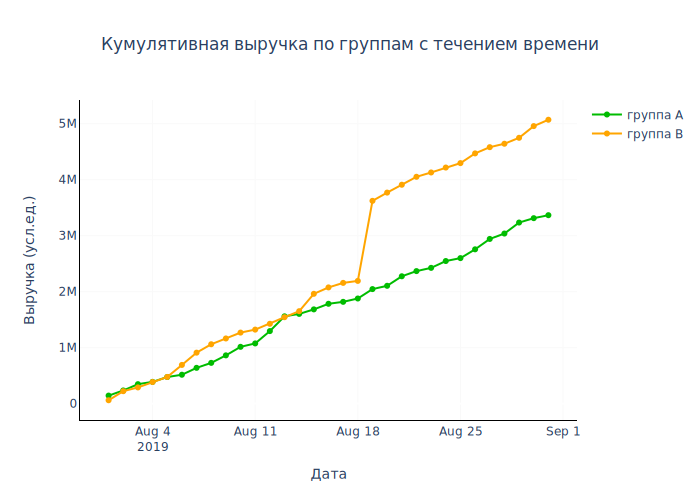

In [30]:
fig = go.Figure()


fig.add_scatter(
    x=cumulative_revenue_a['date_order'], 
    y=cumulative_revenue_a['revenue'],
    mode='lines+markers',
    name="группа A",
    line_color = '#00bc00'
)

fig.add_scatter(
    x=cumulative_revenue_b['date_order'], 
    y=cumulative_revenue_b['revenue'],
    mode='lines+markers',
    name="группа B",
    line_color = '#ffa500'
)

fig.update_xaxes(showline=True, linewidth=1, linecolor='black', gridcolor='#f9f9f9')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', gridcolor='#f9f9f9')

fig.update_layout(
    title='Кумулятивная выручка по группам с течением времени',
    xaxis_title='Дата',
    yaxis_title='Выручка (усл.ед.)',
    plot_bgcolor='#ffffff'
)

fig.update(layout=dict(title=dict(x=0.5)))

fig.show()

Из графика кумулятивной выручки видно, что в целом выручка увеличивается относительно равномерно за весь период проведения теста. Тем не менее в целевой группе B все же наблюдается резкий скачок по выручке. Целевая группа В по накопленным показателям выручки демонстрирует лучшие результаты, чем контрольная группа А. 

В первые несколько дней проведения теста показатели группы В уступали контрольной группе А. Колебание значений метрик для обеих групп в начальный период проведения теста является характерным и связано с эффектом "подглядывания". Далее, до середины месяца кумулятивная выручка группы В превышала выручку группы A. Из графика также видно, что 19 августа 2019 г. резко выросла кумулятивная выручка в группе В, что может быть связано либо с заказом (-ами) на большую стоимость, либо со значительным увеличением числа заказов в эту дату. Далее в работе мы определим причину для столь резкого роста выручки в этот день.  

#### Кумулятивный средний чек по группам

Построим графики среднего чека по группам, разделив кумулятивную выручку на кумулятивное число заказов

In [31]:
cumulative_revenue_a['mean_check'] = (cumulative_revenue_a['revenue'] / cumulative_revenue_a['n_orders']).round(2)
cumulative_revenue_b['mean_check'] = (cumulative_revenue_b['revenue'] / cumulative_revenue_b['n_orders']).round(2)

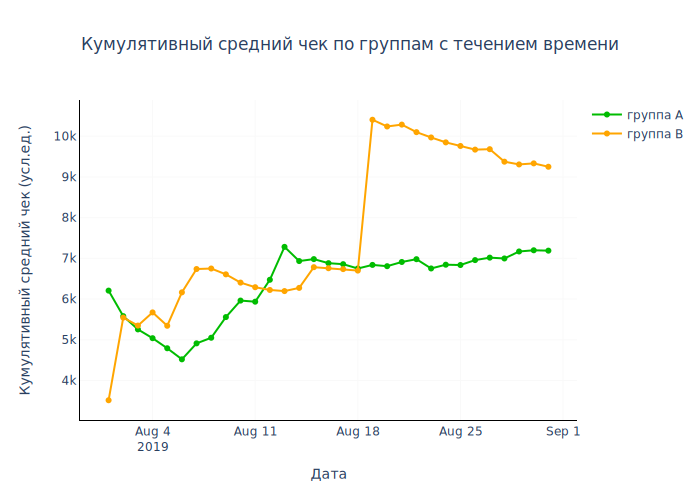

In [32]:
fig = go.Figure()


fig.add_scatter(
    x=cumulative_revenue_a['date_order'], 
    y=cumulative_revenue_a['mean_check'],
    mode='lines+markers',
    name='группа A',
    line_color = '#00bc00'
)

fig.add_scatter(
    x=cumulative_revenue_b['date_order'], 
    y=cumulative_revenue_b['mean_check'],
    mode='lines+markers',
    name='группа B',
    line_color = '#ffa500'
)

fig.update_xaxes(showline=True, linewidth=1, linecolor='black', gridcolor='#f9f9f9')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', gridcolor='#f9f9f9')

fig.update_layout(
    title='Кумулятивный средний чек по группам с течением времени',
    xaxis_title='Дата',
    yaxis_title='Кумулятивный средний чек (усл.ед.)',
    plot_bgcolor='#ffffff'
)

fig.update(layout=dict(title=dict(x=0.5)))

fig.show()

Для кумулятивного среднего чека характерны значительные колебания на начальном этапе проведения теста, и исключая резкий выброс в группе В в середине теста, кумулятивная метрика приходит к некоторому равновесию к концу месяца. Это позволяет лучше охарактеризовать реальный средний чек для обеих групп и сравнить его значения.

#### Относительное изменение кумулятивного среднего чека группы B к группе A

Объединим данные обеих групп по кумулятивному среднему чеку в общий датасет:

In [33]:
merged_сumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b,
                                                        left_on='date_order', right_on='date_order',
                                                        how='left', 
                                                        suffixes=['_a', '_b'])

In [34]:
merged_сumulative_revenue.head()

,date_order,revenue_a,n_orders_a,mean_check_a,revenue_b,n_orders_b,mean_check_b
0,2019-08-01,142779,23,6207.78,59758,17,3515.18
1,2019-08-02,234381,42,5580.50,221801,40,5545.02
2,2019-08-03,346854,66,5255.36,288850,54,5349.07
3,2019-08-04,388030,77,5039.35,385740,68,5672.65
4,2019-08-05,474413,99,4792.05,475648,89,5344.36


На основе датасета *merged_сumulative_revenue* построим график относительного различия для среднего чека:

In [35]:
merged_сumulative_revenue['mean_check_ratio'] = (merged_сumulative_revenue['mean_check_b'] / 
                                                 merged_сumulative_revenue['mean_check_a']).round(2)

merged_сumulative_revenue.head()

,date_order,revenue_a,n_orders_a,mean_check_a,revenue_b,n_orders_b,mean_check_b,mean_check_ratio
0,2019-08-01,142779,23,6207.78,59758,17,3515.18,0.57
1,2019-08-02,234381,42,5580.50,221801,40,5545.02,0.99
2,2019-08-03,346854,66,5255.36,288850,54,5349.07,1.02
3,2019-08-04,388030,77,5039.35,385740,68,5672.65,1.13
4,2019-08-05,474413,99,4792.05,475648,89,5344.36,1.12


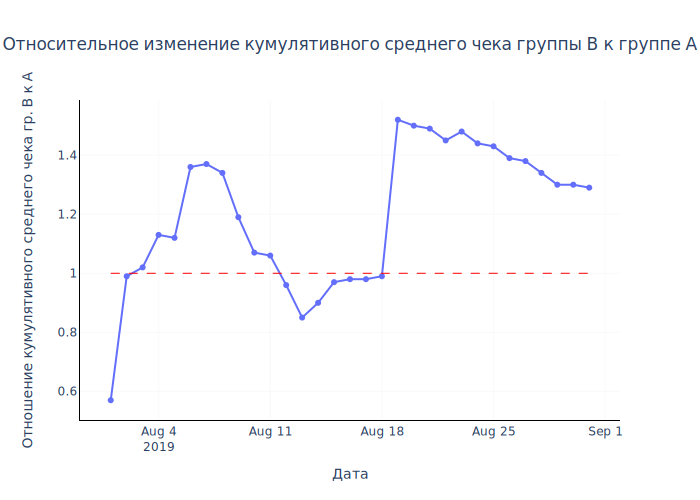

In [36]:
fig = go.Figure()

fig.add_scatter(
    x=merged_сumulative_revenue['date_order'], 
    y=merged_сumulative_revenue['mean_check_ratio'],
    mode='lines+markers'
)

fig.add_shape(type='line',
                x0='2019-08-01',
                y0=1,
                x1='2019-08-31',
                y1=1,
                line=dict(color='Red', dash='dash', width=1),
                xref='x',
                yref='y'
)


fig.update_xaxes(showline=True, linewidth=1, linecolor='black', gridcolor='#f9f9f9')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', gridcolor='#f9f9f9')

fig.update_layout(
    title='Относительное изменение кумулятивного среднего чека группы B к группе A',
    xaxis_title='Дата',
    yaxis_title='Отношение кумулятивного среднего чека гр. В к А',
    plot_bgcolor='#ffffff'
)

fig.update(layout=dict(title=dict(x=0.5)))



fig.show()

Из графика видно, что в первые две недели проведения теста относительное изменение кумулятивного чека демонстрирует волатильность. Это связано как с крупными заказами, так и выбросами по их числу. Тем не менее, исходные данные показывают, что после 19 августа 2019 серьезных всплесков или провалов не наблюдается.

#### Изменение кумулятивной конверсии по группам

Определим кумулятивную конверсию:

In [37]:
cumulative_data['conversion'] = (cumulative_data['n_orders'] / cumulative_data['n_visitors']).round(4)
cumulative_data.head()

,date_order,group,n_orders,n_buyers,revenue,date_visit,n_visitors,conversion
0,2019-08-01,A,23,19,142779,2019-08-01,719,0.0320
1,2019-08-01,B,17,17,59758,2019-08-01,713,0.0238
2,2019-08-02,A,42,36,234381,2019-08-02,1338,0.0314
3,2019-08-02,B,40,39,221801,2019-08-02,1294,0.0309
4,2019-08-03,A,66,60,346854,2019-08-03,1845,0.0358


Сформируем датасеты для контрольной и целевой групп:

In [38]:
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

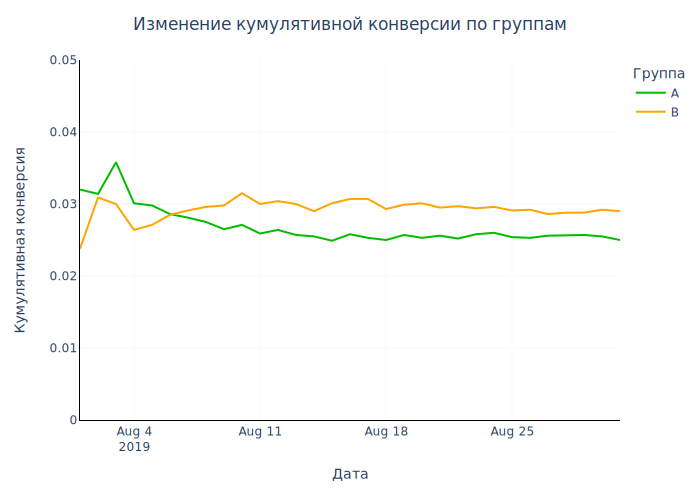

In [39]:
fig = px.line(
    cumulative_data,
    x='date_order',
    y='conversion',
    color='group',
    color_discrete_map={'A':'#00bc00','B':'#ffa500'},
    labels={'group': 'Группа'}
            )

fig.update_xaxes(showline=True, linewidth=1, linecolor='black', gridcolor='#f9f9f9')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', gridcolor='#f9f9f9', range = [0, 0.05])

fig.update_layout(title='Изменение кумулятивной конверсии по группам',
                  xaxis_title='Дата',
                  yaxis_title='Кумулятивная конверсия',
                  plot_bgcolor='#ffffff'
                 )
fig.update(layout=dict(title=dict(x=0.5)))
fig.show()

Исключая начальный период накопления данных, по показателю кумулятивной конверсии целевая группа В демонстрирует лучшие результаты, чем контрольная группа А.

#### Относительное изменение кумулятивной конверсии по группам

Рассмотрим относительное изменение кумулятивной конверсии группы B к группе A:

In [40]:
merged_сumulative_сonversions = cumulative_data_a[['date_order','conversion']].merge(
                                                    cumulative_data_b[['date_order','conversion']],
                                                    on='date_order',
                                                    how='left',
                                                    suffixes=['_a', '_b']
                                                )

In [41]:
merged_сumulative_сonversions['сumulative_сonversions_ratio'] = \
                                merged_сumulative_сonversions['conversion_b'] / merged_сumulative_сonversions['conversion_a']-1
merged_сumulative_сonversions.head()

,date_order,conversion_a,conversion_b,сumulative_сonversions_ratio
0,2019-08-01,0.0320,0.0238,-0.256250
1,2019-08-02,0.0314,0.0309,-0.015924
2,2019-08-03,0.0358,0.0300,-0.162011
3,2019-08-04,0.0301,0.0264,-0.122924
4,2019-08-05,0.0298,0.0271,-0.090604


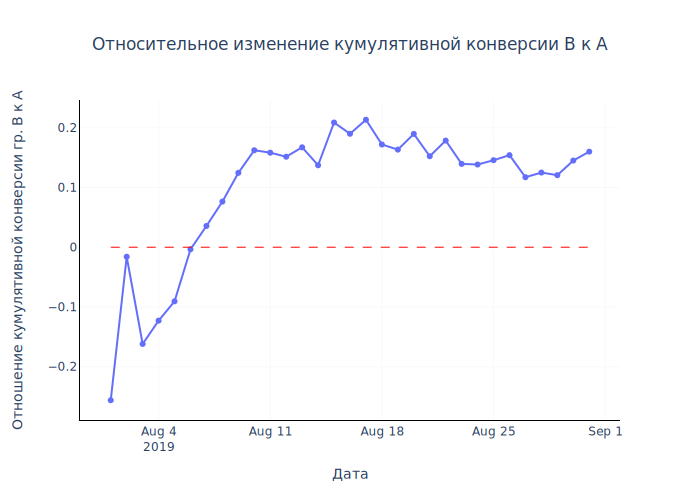

In [42]:
fig = go.Figure()

fig.add_scatter(
    x=merged_сumulative_сonversions['date_order'], 
    y=merged_сumulative_сonversions['сumulative_сonversions_ratio'],
    mode='lines+markers'
)

fig.add_shape(type='line',
                x0='2019-08-01',
                y0=0,
                x1='2019-08-31',
                y1=0,
                line=dict(color='Red', dash='dash', width=1),
                xref='x',
                yref='y'
)

fig.update_xaxes(showline=True, linewidth=1, linecolor='black', gridcolor='#f9f9f9')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', gridcolor='#f9f9f9')

fig.update_layout(
    title='Относительное изменение кумулятивной конверсии B к A',
    xaxis_title='Дата',
    yaxis_title='Отношение кумулятивной конверсии гр. В к А',
    plot_bgcolor='#ffffff'
)

fig.update(layout=dict(title=dict(x=0.5)))

fig.show()

fig.write_html("C:/Users/77776/Desktop/hypothesis.html")

График относительного различия кумулятивной конверсии группы В к группе А во времени наглядно показывает лучшие показатели целевой группы В. Из графика также видно, что относительные значения конверсии стабилизировались в середине теста.

#### Количество заказов по пользователям

Изучим данные о распределении заказов по их количеству:

In [43]:
df_orders_by_users = df_orders.groupby('visitor_id') \
                              .agg({'transaction_id':'nunique', 'group':'max'}) \
                              .rename(columns={'transaction_id':'n_orders'}) \
                              .reset_index()
df_orders_by_users.head()

,visitor_id,n_orders,group
0,5114589,1,B
1,6958315,1,B
2,11685486,1,A
3,39475350,1,B
4,47206413,1,B


In [44]:
def annotation_graphs(graph, layout='h'):
    '''Функция добавляет аннотацию значений на графики в зависимости от горизонтальной (h) или 
    вертикальной (v) ориентации столбцов барплота'''
    if layout == 'h':
        for p in graph.patches:
            graph.annotate(format(p.get_width(), '.1f'), 
                           (p.get_x() + p.get_width() + 3, p.get_y() + p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           textcoords = 'offset points')
    else: 
        for p in g.patches:
            g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points') 

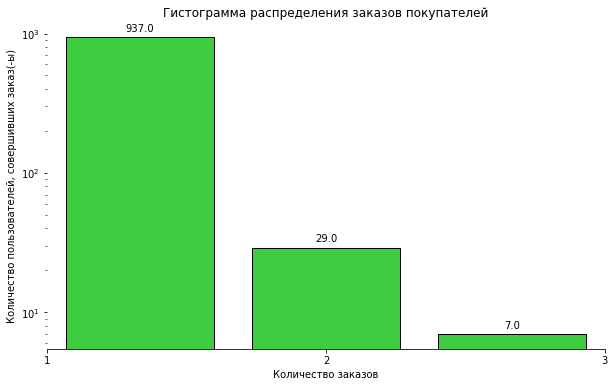

In [45]:
plt.figure(figsize=(10, 6))

g = sns.histplot(data = df_orders_by_users, x='n_orders', bins = 3, color ='#00bc00', shrink=.8)

g.set_xlim(1,3)
g.set_xticks(range(1,4))
g.set_yscale('log')

g.set_title('Гистограмма распределения заказов покупателей')
g.set_ylabel('Количество пользователей, совершивших заказ(-ы)')
g.set_xlabel('Количество заказов')
sns.despine(left=True, bottom=False, right=True)

# Аннотация и вывод графика
annotation_graphs(g, 'v')
plt.show()

Из гистограммы видно, что подавляющее число пользователей за период проведения A/B теста сделало по одному заказу.

Построим точечный график, чтобы получить дополнительную информацию о пользователях, совершивших 2 и более заказов в каждой группе:

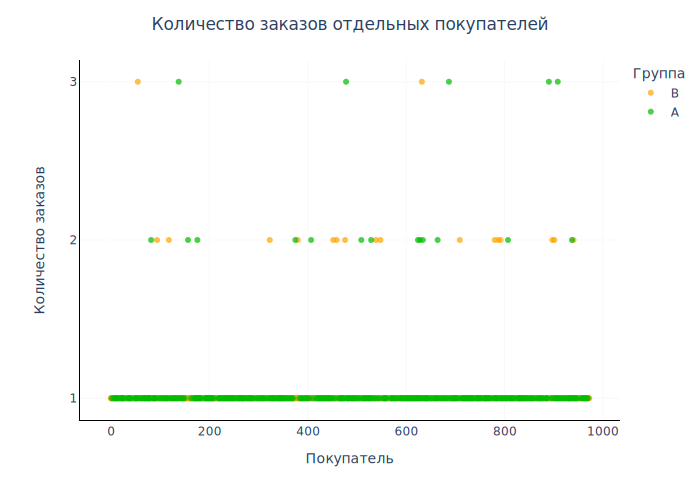

In [46]:
x_values = pd.Series(range(0,len(df_orders_by_users['visitor_id'])))
fig = px.scatter(
    df_orders_by_users,
    x=x_values, y='n_orders', color='group',
    hover_data=['visitor_id'], 
    color_discrete_map={'A':'#00bc00','B':'#ffa500'},
    opacity=0.7,
    labels={'group': 'Группа'}
)

fig.update_xaxes(showline=True, linewidth=1, linecolor='black', gridcolor='#f9f9f9')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', gridcolor='#f9f9f9', dtick=[1,2,3])

fig.update_layout(
    title='Количество заказов отдельных покупателей',
    xaxis_title='Покупатель',
    yaxis_title='Количество заказов',
    plot_bgcolor='#ffffff'
)

fig.update(layout=dict(title=dict(x=0.5)))

fig.show()

Из точечного графика видно, что пользователи, сделавшие три покупки в основном пришли из группы A, а те кто совершил по две покупки пришли равномерно из обеих групп.

**95-й и 99-й перцентили количества заказов на пользователя**

С целью выявить пользователей, которые совершили нехарактерное для выборки количество заказов, рассчитаем 95-й и 99-й перцентили:

In [47]:
print(np.percentile(df_orders_by_users['n_orders'], [95, 99])) 

[1. 2.]


Из результатов следует, что не более 5% покупателей совершили свыше 1-ой покупки, и не более 1% покупателей совершили свыше 2-х покупок.

#### Cтоимость заказов

Рассмотрим как выглядит распределение по стоимости заказов:

In [48]:
df_orders_by_revenue = df_orders[['transaction_id','revenue','group']]
df_orders_by_revenue.head()

,transaction_id,revenue,group
0,3667963787,1650,B
1,2804400009,730,B
3,3797467345,9759,B
4,2282983706,2308,B
5,182168103,2210,B


Общая информация по стоимости заказов приведена ниже:

In [49]:
pd.options.display.float_format = '{:6.0f}'.format
df_orders_by_revenue['revenue'].describe()

count      1016
mean       8301
std       42122
min          50
25%        1190
50%        2955
75%        8134
max     1294500
Name: revenue, dtype: float64

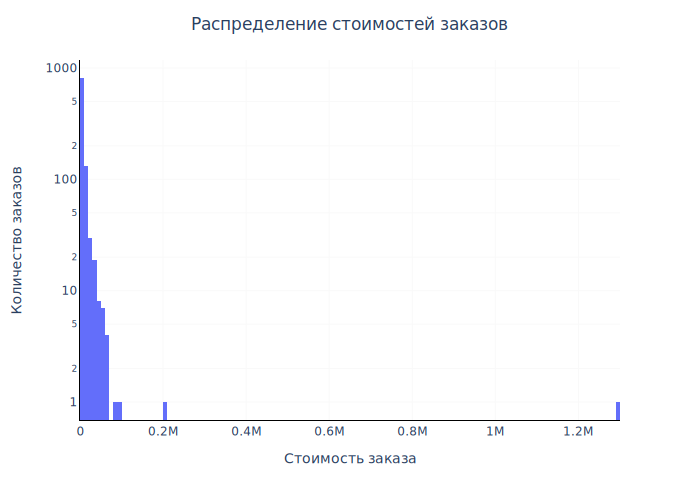

In [50]:
fig = px.histogram(df_orders_by_revenue, x='revenue', nbins=200, log_y=True)

fig.update_xaxes(showline=True, linewidth=1, linecolor='black', gridcolor='#f9f9f9')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', gridcolor='#f9f9f9')

fig.update_layout(
    title='Распределение стоимостей заказов',
    xaxis_title='Стоимость заказа',
    yaxis_title='Количество заказов',
    plot_bgcolor='#ffffff'
)

fig.update(layout=dict(title=dict(x=0.5)))

fig.show()

Из графика видно, что за период проведения теста было выполнено несколько заказов на сумму, значительно превышающую стоимость традиционной покупки.

**95-й и 99-й перцентили стоимости заказов**

Определим 95-й и 99-й перцентили стоимости заказов в выборке, чтобы выявить аномальные по стоимости заказы:

In [51]:
revenue_95_percentile = np.percentile(df_orders_by_revenue['revenue'], 95)
print('95-й персентиль стоимости заказов (усл.ед):', revenue_95_percentile)

95-й персентиль стоимости заказов (усл.ед): 26785.0


In [52]:
revenue_99_percentile = np.percentile(df_orders_by_revenue['revenue'], 99)
print('99-й персентиль стоимости заказов (усл.ед):', revenue_99_percentile)

99-й персентиль стоимости заказов (усл.ед): 53904.0


Построим точечный график с информацией о стоимости каждого заказа:

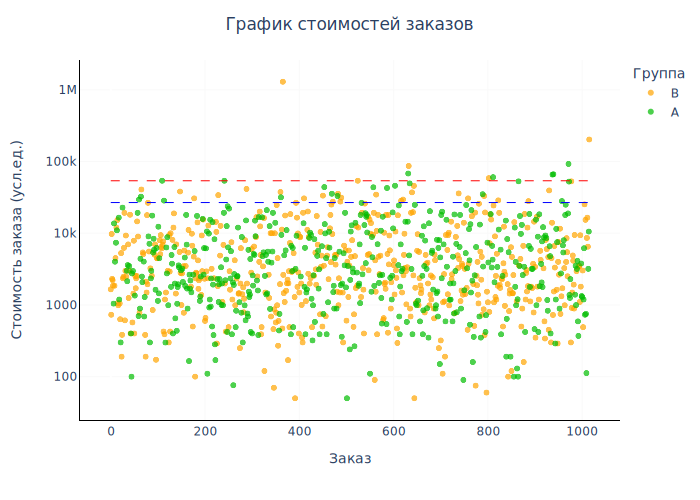

In [53]:
x_values = pd.Series(range(0,len(df_orders_by_revenue['transaction_id'])))
fig = px.scatter(
    df_orders_by_revenue,
    x=x_values, y='revenue', color='group',
    hover_data=['transaction_id'], 
    color_discrete_map={'A':'#00bc00','B':'#ffa500'},
    opacity=0.7,
    labels={'group': 'Группа'},
    log_y=True
)

# линия 95-го перцентиля
fig.add_shape(type='line',
                x0=0,
                y0=revenue_95_percentile,
                x1=len(df_orders_by_revenue['transaction_id']),
                y1=revenue_95_percentile,
                line=dict(color='Blue', dash='dash', width=1),
                xref='x',
                yref='y'
)


# линия 99-го перцентиля
fig.add_shape(type='line',
                x0=0,
                y0=revenue_99_percentile,
                x1=len(df_orders_by_revenue['transaction_id']),
                y1=revenue_99_percentile,
                line=dict(color='Red', dash='dash', width=1),
                xref='x',
                yref='y'
)


fig.update_xaxes(showline=True, linewidth=1, linecolor='black', gridcolor='#f9f9f9')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', gridcolor='#f9f9f9', dtick=[1,2,3])

fig.update_layout(
    title='График стоимостей заказов',
    xaxis_title='Заказ',
    yaxis_title='Стоимость заказа (усл.ед.)',
    plot_bgcolor='#ffffff'
)

fig.update(layout=dict(title=dict(x=0.5)))


fig.show()

На графике наглядно видно количество заказов, превышающих по стоимости 95-й перцентиль (синяя линия) и 99-й перцентиль (красная линия) для целевой и контрольной групп. 

#### Статистическая значимость различий в конверсии между группами по «сырым» данным

На начальном этапе оценим статистическую значимость метрик по "сырым" данным:

(1) Сформируем таблицы с информацией о количестве посетителей в выбранную дату в группах A и B:

In [54]:
# группа A
visitors_a_daily = df_visitors[df_visitors['group'] == 'A'][['date_visit', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

# группа B
visitors_b_daily = df_visitors[df_visitors['group'] == 'B'][['date_visit', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

(2) Сформируем таблицы с информацией о количестве посетителей до выбранной даты включительно в группах A и B:

In [55]:
# группа A
visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

# группа B
visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

(3) Сформируем таблицы с информацией о количестве заказов и суммарной выручке в выбранную дату для групп А и В:

In [56]:
# группа А
orders_a_daily = (
                    df_orders[df_orders['group'] == 'A'][['date_order', 'transaction_id', 'visitor_id', 'revenue']]
                    .groupby('date_order', as_index=False)
                    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)

orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

# группа B
orders_b_daily = (
                    df_orders[df_orders['group'] == 'B'][['date_order', 'transaction_id', 'visitor_id', 'revenue']]
                    .groupby('date_order', as_index=False)
                    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)

orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

(4) Сформируем таблицы с информацией о количестве заказов и суммарной выручке до выбранной даты включительно для групп А и В:

In [57]:
# группа А
orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_a_cummulative.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
]

# группа B
orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_b_cummulative.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b',
]

(5) Объединим таблицы из шагов (1)-(4) в единый датасет по дате визита (заказа): 

In [58]:
data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


(6) Создадим переменные, содержащие информацию о пользователях групп А и В, с указанием числа совершенных заказов:

In [59]:
# группа А
orders_by_users_a = (
    df_orders[df_orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)

orders_by_users_a.columns = ['visitor_id', 'n_orders']

# группа В
orders_by_users_b = (
    df_orders[df_orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)

orders_by_users_b.columns = ['visitor_id', 'n_orders']

(7) Объявим переменные *sample_a* и *sample_b*, в которых пользователям из групп А и В будет соответствовать количество заказов. Пользователям, которые не совершили заказ, будут соответствовать нули. Их количество равно разнице между суммой посетителей и количеством записей о заказах. 

In [60]:
# группа А
sample_a = pd.concat(
    [
        orders_by_users_a['n_orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['n_orders'])
            ),
            name='n_orders',
        ),
    ],
    axis=0,
)

# группа B
sample_b = pd.concat(
    [
        orders_by_users_b['n_orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['n_orders'])
            ),
            name='n_orders',
        ),
    ],
    axis=0,
)

(8) Вычислим конверсии по «сырым» данным для групп А и В:

In [61]:
conversion_group_a = round(sample_a.mean(), 4)
print('Конверсия по "сырым" данным группы А:', conversion_group_a)

Конверсия по "сырым" данным группы А: 0.025


In [62]:
conversion_group_b = round(sample_b.mean(), 4)
print('Конверсия по "сырым" данным группы B:', conversion_group_b)

Конверсия по "сырым" данным группы B: 0.029


(9) Выведем относительный прирост конверсии группы B по «сырым» данным:

In [63]:
print("{0:.1%}".format(conversion_group_b / conversion_group_a - 1))

16.0%


(10) Используя непараметрический тест Уилкоксона-Манна-Уитни, оценим статистическую значимость различий в конверсии между группами А и В по «сырым» данным. Данный тест исключает существенное влияние выбивающихся значений на результат благодаря сравнению рангов одних и тех же значений (а не самих значений), попавших в обе выборки. Примем во внимание, что данный тест часто выполняется в виде двустороннего, исключая его направленность. 

В этом случае, гипотеза H0 для "сырых" данных сформулирована следующим образом: различие в конверсиях в группе А и в группе В статистически не значимо. Альтернативная гипотеза H1: разница в конверсии между группой А и группой B статистически значима.

In [64]:
alpha = 0.05  # критический уровень статистической значимости
results_conversion_raw_data = stats.mannwhitneyu(sample_a, sample_b, alternative = 'two-sided')

print('p-значение: ', results_conversion_raw_data.pvalue.round(3))

if results_conversion_raw_data.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу: разница статистически не значима'
    )

p-значение:  0.011
Отвергаем нулевую гипотезу: разница статистически значима


#### Cтатистическая значимость различий в среднем чеке заказа между группами А и В по «сырым» данным

Вычислим средний чек по «сырым» данным для групп А и В:

In [65]:
raw_data_revenue_a = df_orders[df_orders['group']=='A']['revenue']
raw_data_revenue_b = df_orders[df_orders['group']=='B']['revenue']

# Суммарная выручка по "сырым" данным
print('Суммарная выручка по «сырым» данным для группы А (усл.ед.):', raw_data_revenue_a.sum())
print('Суммарная выручка по «сырым» данным для группы B (усл.ед.):', raw_data_revenue_b.sum())

# Средний чек по "сырым" данным
raw_data_mean_check_a = round(raw_data_revenue_a.mean(), 2)
raw_data_mean_check_b = round(raw_data_revenue_b.mean(), 2)

print()
print('Средний чек по «сырым» данным для группы А (усл.ед.):', raw_data_mean_check_a)
print('Средний чек по «сырым» данным для группы B (усл.ед.):', raw_data_mean_check_b)

Суммарная выручка по «сырым» данным для группы А (усл.ед.): 3364656
Суммарная выручка по «сырым» данным для группы B (усл.ед.): 5068972

Средний чек по «сырым» данным для группы А (усл.ед.): 7189.44
Средний чек по «сырым» данным для группы B (усл.ед.): 9249.95


Найдём относительное различие в среднем чеке между группами по «сырым» данным:

In [66]:
print('{0:.3f}'.format(raw_data_mean_check_b / raw_data_mean_check_a - 1))

0.287


Найдём относительное различие в суммарной выручке между группами по «сырым» данным:

In [67]:
print('{0:.1%}'.format(raw_data_revenue_b.sum() / raw_data_revenue_a.sum() - 1))

50.7%


Рассчитаем статистическую значимость различий в среднем чеке между группами А и В. В качестве гипотезы для двусторонней альтернативы критерия Уилкоксона-Манна-Уитни H0 принимаем предположение, что различие в среднем чеке группы А и среднем чеке группы В статистически не значимо. Альтернативная гипотеза H1: различие в среднем чеке группы А и среднем чеке группы В статистически значимо.

In [68]:
alpha = 0.05  # критический уровень статистической значимости
results_mean_check_raw_data = stats.mannwhitneyu(raw_data_revenue_a, raw_data_revenue_b, alternative = 'two-sided')

print('p-значение: ', results_mean_check_raw_data.pvalue.round(3))

if results_mean_check_raw_data.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу: разница статистически не значима'
    )

p-значение:  0.829
Не получилось отвергнуть нулевую гипотезу: разница статистически не значима


#### Статистическая значимость различий в конверсии между группами A и В по «очищенным» данным

В предыдущих частях работы было определено, что 95-й и 99-й перцентили количества заказов на одного пользователя равны 1-му и 2-м заказам на пользователя. 95-й и 99-й перцентили среднего чека равны 26785 усл.ед. и 53904 усл.ед.

(1) Примем за аномальных пользователей тех, кто совершил более 1 заказа или сделан заказ на сумму дороже 27000 усл.ед.

(2) Определим количество пользователей, создающих выбросы в данных:

In [69]:
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['n_orders'] > 1]['visitor_id'],
        orders_by_users_b[orders_by_users_b['n_orders'] > 1]['visitor_id'],
    ],
    axis=0,
)

users_with_expensive_orders = df_orders[df_orders['revenue'] > 27000]['visitor_id']

abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormal_users.head(5))
print(abnormal_users.shape) 

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitor_id, dtype: int64
(86,)


Используя в качестве отсечки 95-й перцентиль было выявлено 86 покупателей (8.5% от общего числа покупателей), чьи покупки создают выбросы в данных.

(3) Подготовим выборки количества заказов по пользователям по для групп А и В, исключая пользователей, создающих выбросы в данных:

In [70]:
# группа А

sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['n_orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['n_orders'])
            ),
            name='n_orders',
        ),
    ],
    axis=0,
)

# группа B

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['n_orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['n_orders'])
            ),
            name='n_orders',
        ),
    ],
    axis=0,
)

(4) Вычислим конверсии по «очищенным» данным для групп А и В:

In [71]:
conversion_group_a_filtered_95pct = round(sample_a_filtered.mean(), 3)
print('Конверсия по "очищенным" данным группы А:', conversion_group_a_filtered_95pct)

Конверсия по "очищенным" данным группы А: 0.022


In [72]:
conversion_group_b_filtered_95pct = round(sample_b_filtered.mean(), 3)
print('Конверсия по "очищенным" данным группы B:', conversion_group_b_filtered_95pct)

Конверсия по "очищенным" данным группы B: 0.025


(5) Выведем относительный прирост конверсии группы B по «очищенным» данным:

In [73]:
print("{0:.1%}".format(conversion_group_b_filtered_95pct / conversion_group_a_filtered_95pct - 1))

13.6%


(6) Применим статистический критерий Уилкоксона-Манна-Уитни к полученным выборкам для оценки конверсий. Гипотеза H0 для "очищенных" данных сформулирована следующим образом: различие в конверсиях в группе А и в группе В статистически не значимо. Альтернативная гипотеза H1: разница в конверсии между группой А и группой B статистически значима.

In [74]:
alpha = 0.05  # критический уровень статистической значимости
results_conversion_filtered_95pct_data = stats.mannwhitneyu(sample_a_filtered, sample_b_filtered, alternative = 'two-sided')

print('p-значение: ', results_conversion_filtered_95pct_data.pvalue.round(3))

if results_conversion_filtered_95pct_data.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу: разница статистически не значима'
    )

p-значение:  0.016
Отвергаем нулевую гипотезу: разница статистически значима


#### Статистическая значимость различий в среднем чеке заказа между группами A и В по «очищенным» данным

(1) Вычислим средний чек по «очищенным» данным для групп А и В:

In [75]:
# Группа А и фильтрация по 95-му перцентилю
df_orders_a = df_orders[df_orders['group']=='A']
filtered_95pct_data_revenue_a = df_orders_a[np.logical_not(df_orders_a['visitor_id'].isin(abnormal_users))]['revenue']

# Группа B и фильтрация по 95-му перцентилю
df_orders_b = df_orders[df_orders['group']=='B']
filtered_95pct_data_revenue_b = df_orders_b[np.logical_not(df_orders_b['visitor_id'].isin(abnormal_users))]['revenue']

# Суммарная выручка по "очищенным" данным
print('Суммарная выручка по «очищенным» данным для группы А (усл.ед.):', filtered_95pct_data_revenue_a.sum())
print('Суммарная выручка по «очищенным» данным для группы B (усл.ед.):', filtered_95pct_data_revenue_b.sum())

# Средний чек по "очищенным" данным
filtered_95pct_data_mean_check_a = round(filtered_95pct_data_revenue_a.mean(), 2)
filtered_95pct_data_mean_check_b = round(filtered_95pct_data_revenue_b.mean(), 2)

print()
print('Средний чек по «очищенным» данным для группы А (усл.ед.):', filtered_95pct_data_mean_check_a)
print('Средний чек по «очищенным» данным для группы B (усл.ед.):', filtered_95pct_data_mean_check_b)

Суммарная выручка по «очищенным» данным для группы А (усл.ед.): 2048875
Суммарная выручка по «очищенным» данным для группы B (усл.ед.): 2345477

Средний чек по «очищенным» данным для группы А (усл.ед.): 5046.49
Средний чек по «очищенным» данным для группы B (усл.ед.): 4876.25


(2) Найдём относительное различие в среднем чеке между группами по «очищенным» данным:

In [76]:
print('{0:.3f}'.format(filtered_95pct_data_mean_check_b / filtered_95pct_data_mean_check_a - 1))

-0.034


(3) Найдём относительное различие в суммарной выручке между группами по «очищенным» данным:

In [77]:
print('{0:.1%}'.format(filtered_95pct_data_revenue_b.sum() / filtered_95pct_data_revenue_a.sum() - 1))

14.5%


Рассчитаем статистическую значимость различий в среднем чеке между группами А и В. В качестве гипотезы для двусторонней альтернативы критерия Уилкоксона-Манна-Уитни H0 принимаем предположение, что различие в среднем чеке группы А и среднем чеке группы В для "очищенных" данных статистически не значимо. Альтернативная гипотеза H1: различие в среднем чеке группы А и среднем чеке группы В статистически значимо.

In [78]:
alpha = 0.05  # критический уровень статистической значимости
results_mean_check_filtered_95pct_data = stats.mannwhitneyu(
                                            filtered_95pct_data_revenue_a, \
                                            filtered_95pct_data_revenue_b, \
                                            alternative = 'two-sided'
)

print('p-значение: ', results_mean_check_filtered_95pct_data.pvalue.round(3))

if results_mean_check_filtered_95pct_data.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу: разница статистически не значима'
    )

p-значение:  0.727
Не получилось отвергнуть нулевую гипотезу: разница статистически не значима


#### Решение по результатам A/B теста

Оценим полученные данные после обработки результатов А/В теста:

* **Конверсия**

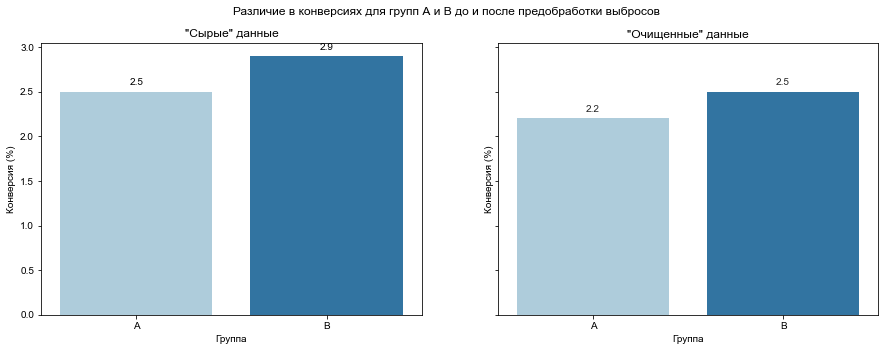

In [79]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 5), sharey=True)

fig.suptitle('Различие в конверсиях для групп А и В до и после предобработки выбросов')
g = sns.barplot(ax=axes[0],
                x=['A','B'],
                y=[conversion_group_a*100, conversion_group_b*100],
                palette = 'Paired'
               )

g.set_xticklabels(g.get_xticklabels())
g.set_title('"Сырые" данные')
g.set_ylabel('Конверсия (%)')
g.set_xlabel('Группа')

annotation_graphs(g, 'v')

g = sns.barplot(ax=axes[1],
                x=['A','B'],
                y=[conversion_group_a_filtered_95pct*100, conversion_group_b_filtered_95pct*100],
                palette = 'Paired'
               )

g.set_xticklabels(g.get_xticklabels())
g.set_title('"Очищенные" данные')
g.set_ylabel('Конверсия (%)')
g.set_xlabel('Группа')

sns.set_style('whitegrid', {
    'ytick.major.size':0.5,
    'grid.linestyle': '--'
 })

annotation_graphs(g, 'v')

plt.show()

Относительный прирост конверсии группы B:
- по «сырым» данным: 16.0%
- по «очищенным» данным: 13.6%

По результатам A/B теста получено, что различие между конверсиями в группах А и В статистически значимо как для "сырых", так и для "очищенных" данных.

* **Средний чек**

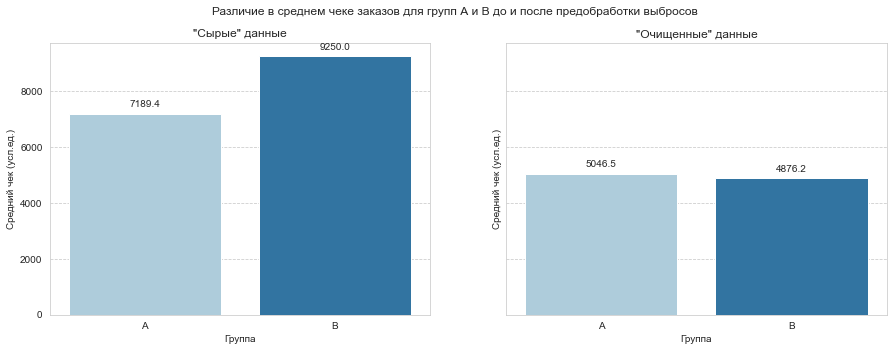

In [80]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 5), sharey=True)

fig.suptitle('Различие в среднем чеке заказов для групп А и В до и после предобработки выбросов')
g = sns.barplot(ax=axes[0],
                x=['A','B'],
                y=[raw_data_mean_check_a, raw_data_mean_check_b],
                palette = 'Paired'
               )

g.set_xticklabels(g.get_xticklabels())
g.set_title('"Сырые" данные')
g.set_ylabel('Средний чек (усл.ед.)')
g.set_xlabel('Группа')

annotation_graphs(g, 'v')

g = sns.barplot(ax=axes[1],
                x=['A','B'],
                y=[filtered_95pct_data_mean_check_a, filtered_95pct_data_mean_check_b],
                palette = 'Paired'
               )

g.set_xticklabels(g.get_xticklabels())
g.set_title('"Очищенные" данные')
g.set_ylabel('Средний чек (усл.ед.)')
g.set_xlabel('Группа')

sns.set_style('whitegrid', {
    'ytick.major.size': 2000,
    'grid.linestyle': '--'
 })

annotation_graphs(g, 'v')

plt.show()

Относительное изменение в среднем чеке заказов группы В к группе А:
- по «сырым» данным: 0.287
- по «очищенным» данным: -0.034

По результатам A/B теста получено, что различие в среднем чеке между группами А и В статистически не значимо как для "сырых", так и для "очищенных" данных.

* **Выручка**

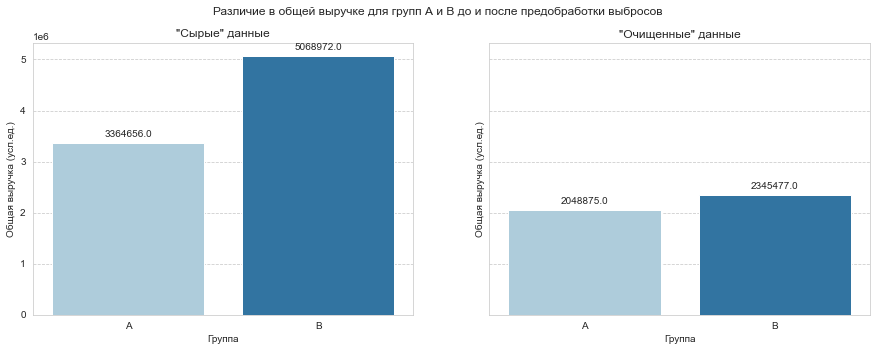

In [81]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 5), sharey=True)

fig.suptitle('Различие в общей выручке для групп А и В до и после предобработки выбросов')
g = sns.barplot(ax=axes[0],
                x=['A','B'],
                y=[raw_data_revenue_a.sum(), raw_data_revenue_b.sum()],
                palette = 'Paired'
               )

g.set_xticklabels(g.get_xticklabels())
g.set_title('"Сырые" данные')
g.set_ylabel('Общая выручка (усл.ед.)')
g.set_xlabel('Группа')

annotation_graphs(g, 'v')

g = sns.barplot(ax=axes[1],
                x=['A','B'],
                y=[filtered_95pct_data_revenue_a.sum(), filtered_95pct_data_revenue_b.sum()],
                palette = 'Paired'
               )

g.set_xticklabels(g.get_xticklabels())
g.set_title('"Очищенные" данные')
g.set_ylabel('Общая выручка (усл.ед.)')
g.set_xlabel('Группа')

sns.set_style('whitegrid', {
    'ytick.major.size': 1000000,
    'grid.linestyle': '--'
 })

annotation_graphs(g, 'v')
plt.show()

Относительное изменение в общей выручке группы В к выручке группы А:
- по «сырым» данным: 50.7%
- по «очищенным» данным: 14.5%

**Промежуточные выводы:**
* Есть статистически значимое различие по конверсии между целевой и контрольной группами как по "сырым" данным, так и после фильтрации аномалий.
* Относительный прирост конверсии группы B по «сырым» данным составляет 16.0%, по «очищенным» данным 13.6%.
* Различие в среднем чеке между группами А и В статистически не значимо как для "сырых", так и для "очищенных" данных.
* Абсолютные значения средних чеков для двух групп практически равны после удаления выбросов по нескольким заказам и заказам на аномальную стоимость.
* Относительное изменение в среднем чеке заказов группы В к группе А составляют по «сырым» данным 28.7%, по «очищенным» данным -3.4%.
* Относительное изменение в общей выручке группы В к выручке группы А по «сырым» данным составляет 50.7%, по «очищенным» данным 14.5%.

## Выводы и рекомендации

**Первая часть проекта**

В качестве приоритетных для тестирования рассмотреть гипотезы направленные на добавление:
* формы подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок,
* блоков рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа,
* двух новых каналов привлечения трафика и размещение на главной странице баннера с актуальными акциями и распродажами.

**Вторая часть проекта**
* График относительного изменения кумулятивной конверсии между группами показывает, что результаты целевой группы B по этому показателю на 13.6% лучше группы A и зафиксировались около среднего значения.
* Различие в среднем чеке между целевой группой В и контрольной группой А статистически не значимо.
* Относительное изменение в общей выручке за время проведения теста для целевой группы В увеличилось на 14.5% к выручке в контрольной группе А, что связано с увеличением конверсии в целевой группе.

**Общие рекомендации отделу маркетинга**:
* А/В-тест можно зафиксировать и рекомендовать внедрить гипотезу, как способствующую увеличению конверсии и общей выручки интернет-магазина.
* Рассмотреть возможность тестирования гипотез, направленных на увеличение среднего чека заказов.